In [7]:
import numpy as np
import matplotlib.pyplot as plt

### The Line:  y=mx+b
 

`y` : Dependent variable (The output/prediction).

`x` : Independent variable (The input feature).

`m` : Slope (Determines the steepness and direction).

`b` : y-intercept (Where the line crosses the vertical axis).

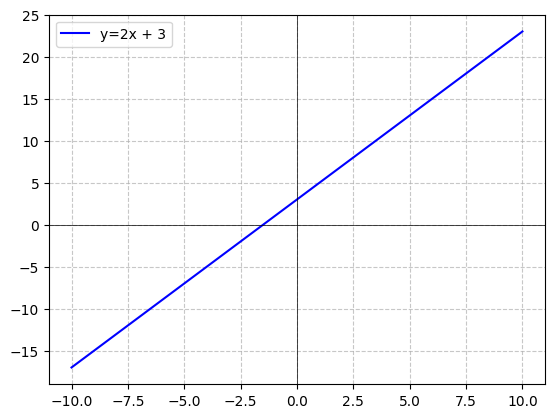

In [8]:
m = 2
b = 3

# generate data
x = np.linspace(-10, 10, 100)
y = m * x + b

_ = plt.plot(x, y, label=f'y={m}x + {b}', color='blue')
_ = plt.axhline(0, color='black', linewidth=0.5)
_ = plt.axvline(0, color='black', linewidth=0.5)
_ = plt.grid(True, linestyle='--', alpha=0.7)
_ = plt.legend()

### Add noise to the data

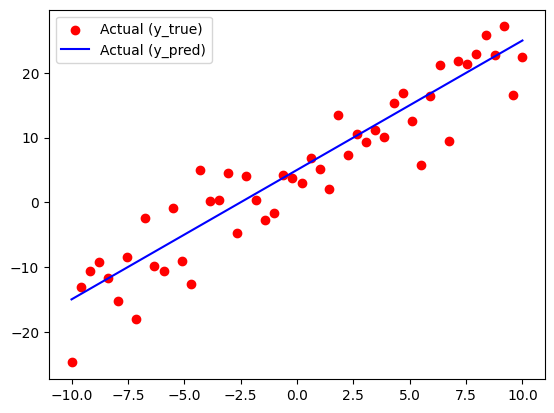

In [9]:
m, b = 2, 5
x = np.linspace(-10, 10, 50)

y_true = m * x + b + (np.random.randn(50) * 4)

y_pred = m * x + b

_ = plt.scatter(x, y_true, color='red', label=f'Actual (y_true)')
_ = plt.plot(x, y_pred, color='blue', label=f'Actual (y_pred)')
_ = plt.legend()

### Plotting of residuals

Mean Error: 0.12
Mean Squred Error: 10.55
Root Mean Squred Error: 3.25


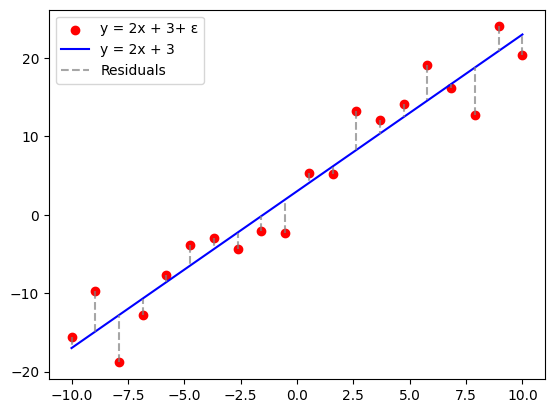

In [10]:
m, b = 2, 3
x = np.linspace(-10, 10, 20)
y_true = m * x + b + (np.random.randn(20) * 4)
y_pred = m * x + b

residuals = y_true - y_pred
mse = np.mean(residuals ** 2)

print(f'Mean Error: {np.mean(residuals):.2f}')
print(f'Mean Squred Error: {mse:.2f}')
print(f'Root Mean Squred Error: {np.sqrt(mse):.2f}')

_ = plt.scatter(x, y_true, color='red', label=f'y = {m}x + {b}+ ε')
_ = plt.plot(x, y_pred, color='blue', label=f'y = {m}x + {b}')
_ = plt.vlines(x, y_true, y_pred, color='gray', linestyle='--', alpha=0.7, label='Residuals')
_ = plt.legend()

### Guess slope and intercept of age and height data

In [11]:
# 1. Hardcoded Data (20 samples)
age = np.array([2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
                12, 13, 14, 15, 16, 17, 18, 19, 20, 21])
height = np.array([72,  65,  98,  80,  95, 108, 100, 145, 120, 128,
                   118, 138, 142, 110, 165, 158, 172, 165, 185, 175])

# 2. Manual Guesses (m, b)
guesses = [(3, 80), (5, 65), (7, 40)]

Guess 1 (m=3, b=80):
  Mean Error: 12.45
  MSE: 562.05
  RMSE: 23.71

Guess 2 (m=5, b=65):
  Mean Error: 4.45
  MSE: 208.55
  RMSE: 14.44

Guess 3 (m=7, b=40):
  Mean Error: 6.45
  MSE: 278.05
  RMSE: 16.67



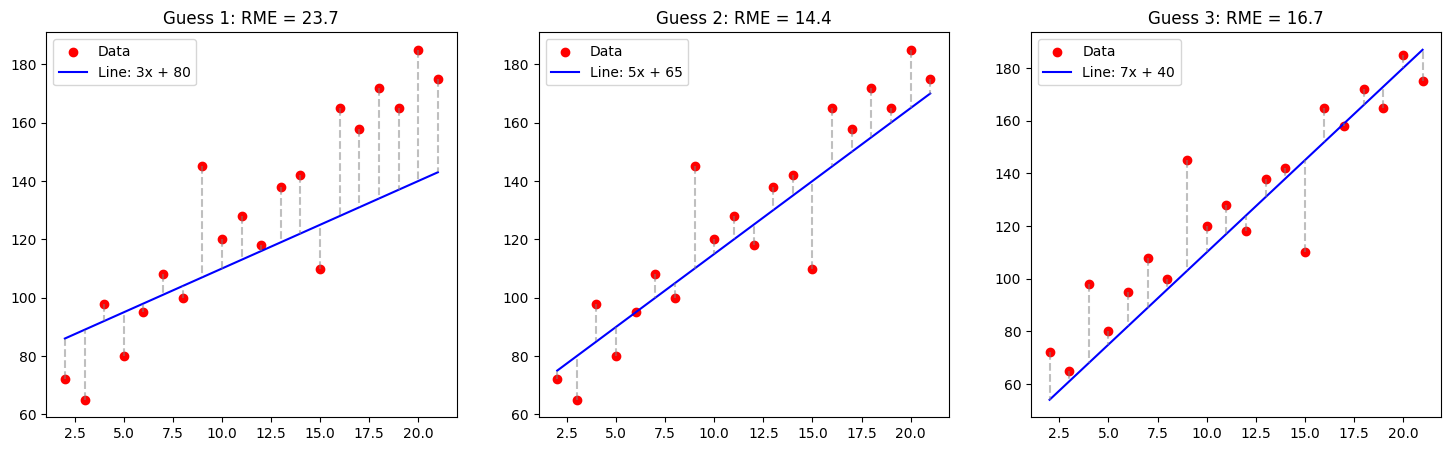

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (m, b) in enumerate(guesses):
  y_pred = m * age + b
  residuals = height - y_pred

  mse = np.mean(residuals**2)
  print(f'Guess {i+1} ({m=}, {b=}):')
  print(f'  Mean Error: {np.mean(residuals):.2f}')
  print(f'  MSE: {mse:.2f}')
  print(f'  RMSE: {np.sqrt(mse):.2f}\n')

  _ = axes[i].scatter(age, height, color='red', label='Data')
  _ = axes[i].plot(age, y_pred, color='blue', label=f'Line: {m}x + {b}')
  _ = axes[i].vlines(age, height, y_pred, color='gray', linestyle='--', alpha=0.5)
  _ = axes[i].set_title(f'Guess {i+1}: RME = {np.sqrt(mse):.1f}')
  _ = axes[i].legend()

### Brute force approach for finding best slope and intercept

Pair wise iteration

Check if slope and intercept of the line formed by each pair has minimum rmse

In [13]:
best_rmse = float('inf')
best_m, best_b = 0, 0

for i in range(len(age)):
  for j in range(len(age)):
    if i == j:
      continue

    x1, y1 = age[i], height[i]
    x2, y2 = age[j], height[j]

    if x1 - x2 == 0:
      continue

    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1

    y_pred = m * age + b
    rmse = np.sqrt(np.mean((height-y_pred)**2))

    if rmse < best_rmse:
      best_rmse = rmse
      best_m, best_b = m, b

print('Best Pairwise Fit:')
print(f'  RMSE: {best_rmse:.2f}')
print(f'  Best Slope: {best_m:.2f}')
print(f'  Best Intercept: {best_b:.2f}')

Best Pairwise Fit:
  RMSE: 13.25
  Best Slope: 5.73
  Best Intercept: 60.64


### Optimal Solution with Scikit-Learn

It implements OLS algorithm

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
X = age.reshape(-1, 1)
y = height

model = LinearRegression()
model.fit(X, y)

m = model.coef_[0]
b = model.intercept_

y_pred = model.predict(X)
rmse = np.sqrt(np.mean((y - y_pred)**2))

print(f'Sklearn Optimal Fit:')
print(f' RMSE: {rmse}')
print(f' Slope: {m:.4f}')
print(f' Intercept: {b:.4f}')

LinearRegression()

Sklearn Optimal Fit:
 RMSE: 13.231426192884287
 Slope: 5.6414
 Intercept: 62.0744


### OLS Implementation (From Scratch)

Ordinary Least Squares (OLS)

In [16]:
x_mean = np.mean(age)
y_mean = np.mean(height)

numerator = np.sum((age - x_mean) * (height - y_mean))
denominator = np.sum((age - x_mean)**2)

m = numerator / denominator
b = y_mean - (m * x_mean)

y_pred = m * age + b
rmse = np.sqrt(np.mean((height - y_pred)**2))

print(f"Manual OLS Fit:")
print(f"  Slope (m):     {m:.4f}")
print(f"  Intercept (b): {b:.4f}")
print(f"  RMSE:          {rmse:.4f}")

Manual OLS Fit:
  Slope (m):     5.6414
  Intercept (b): 62.0744
  RMSE:          13.2314
